In [9]:
import time, enum, math
import numpy as np
import pandas as pd
import pylab as plt
from mesa import Agent, Model
from mesa.time import SimultaneousActivation, RandomActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
from mesa.batchrunner import BatchRunner
from networkx.algorithms.shortest_paths.generic import has_path
import networkx as nx
import random
import pickle
import csv
from tqdm import tqdm, trange
from time import sleep

data_path = '../'


# with open((data_path + 'batch_out.pickle'), 'rb') as handle:
#     batch_out = pickle.load(handle)

 
# with open(( data_path + 'batch_keys.csv')) as f:
#     batch_keys=[tuple(line) for line in csv.reader(f)]
# keys = list(batch_out.keys())


# agent_state.to_csv((data_path + 'single_run_output.csv'), header = True)

# Single Run Analysis

In [220]:
# single_run_none = pd.read_csv(data_path + 'open_single_run_out.csv')
# single_run_suez = pd.read_csv(data_path + 'Suez_single_run_output.csv')
# single_run_hormuz = pd.read_csv(data_path + 'Hormuz_single_run_output.csv')
# single_run_malacca = pd.read_csv(data_path + 'Malacca_single_run_output.csv')
# single_run_panama = pd.read_csv(data_path + 'Panama_single_run_output.csv')
# single_run_gibraltar = pd.read_csv(data_path + 'Gibraltar_single_run_output.csv')
# single_run_dover = pd.read_csv(data_path + 'Dover_single_run_output.csv')
# single_run_all = pd.read_csv(data_path + 'Total_single_run_output.csv')

# last_step = single_run_none["Step"].max()

In [ ]:
# ''' Groupby Step'''
# step_none = single_run_none.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# step_suez = single_run_suez.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# step_hormuz = single_run_hormuz.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# step_malacca = single_run_malacca.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# step_panama = single_run_panama.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# step_dover = single_run_dover.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# step_gibraltar = single_run_gibraltar.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# step_all = single_run_all.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]

# ''' Groupby Type'''
# type_none = single_run_none[single_run_none["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# type_suez = single_run_suez[single_run_suez["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# type_hormuz = single_run_hormuz[single_run_hormuz["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# type_malacca = single_run_malacca[single_run_malacca["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# type_panama = single_run_panama[single_run_panama["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# type_dover = single_run_dover[single_run_dover["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# type_gibraltar = single_run_gibraltar[single_run_gibraltar["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
# type_all = single_run_all.groupby("Type")[single_run_all["Step"]==last_step]["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]

In [221]:
type_gibraltar = single_run_gibraltar[single_run_gibraltar["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum()
type_panama = single_run_panama[single_run_panama["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum()
keys=["Open" , "Dover", "Gibraltar", "Hormuz", "Malacca", "Panama", "Suez", "Total"]
types = pd.concat([type_open, type_dover,type_gibraltar, type_hormuz,type_malacca, type_panama, type_suez,  type_all],axis=1, keys=keys)

<ipython-input-221-d7dd00af89b2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  single_run_gibraltar[single_run_gibraltar["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum()


,Route Changes,Destination not reachable,Complete,Success,Stuck
Type,,,,,
['Large'],3,0,15,15,1
['Normal'],1,3,16,16,0
['Small'],3,6,11,11,0


<ipython-input-222-84d7fb5676d6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  single_run_gibraltar.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum().diff(periods=1).plot(ax=ax)


<AxesSubplot:xlabel='Step'>

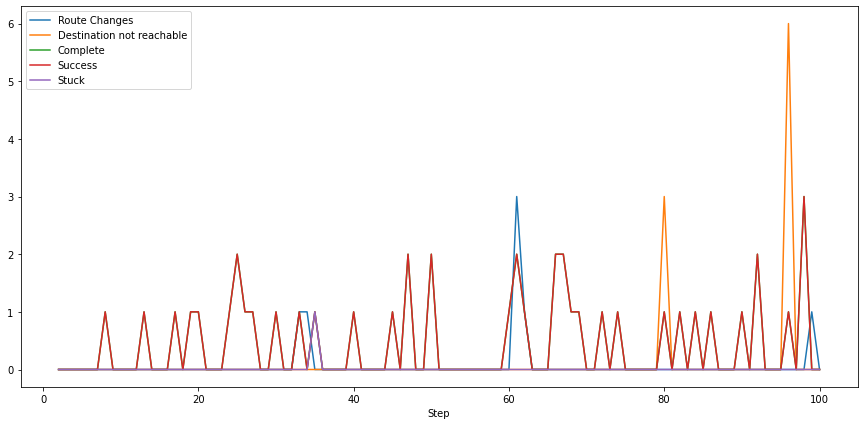

In [222]:
fig, ax = plt.subplots(figsize=(15,7))
single_run_gibraltar.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum().diff(periods=1).plot(ax=ax)

In [206]:
type_single= single_run[single_run["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum()
type_single

<ipython-input-206-0dea632d2f90>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  type_single= single_run[single_run["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum()


,Route Changes,Destination not reachable,Complete,Success,Stuck
Type,,,,,
['Large'],179,0,291,291,0
['Normal'],324,71,418,418,0
['Small'],9,87,227,225,3


<ipython-input-189-c92c5f5b0b71>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  single_run.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum().plot(ax=ax)


<AxesSubplot:title={'center':'Ship statistics (std over time)'}, xlabel='Step'>

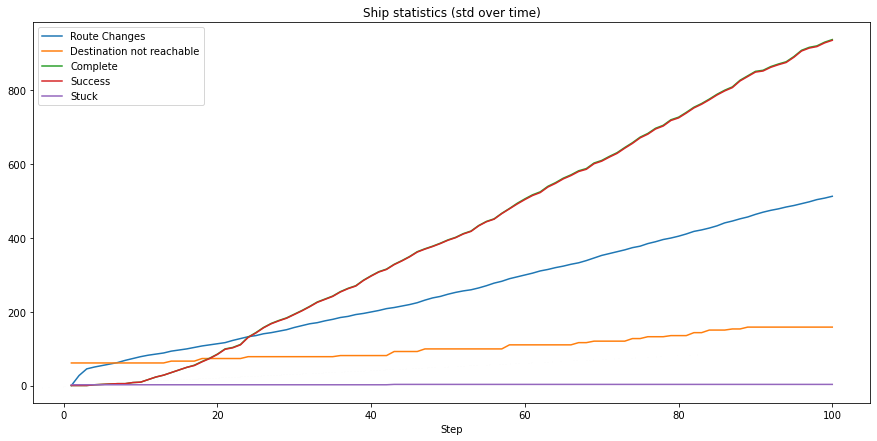

In [189]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Ship statistics (std over time)")
single_run.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum().plot(ax=ax)

In [48]:
grouped = single_run[single_run["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum()

<ipython-input-48-68c0fbfa5808>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  single_run[single_run["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum()


,Route Changes,Destination not reachable,Complete,Success,Stuck
Type,,,,,
['Large'],179,0,291,291,0
['Normal'],324,71,418,418,0
['Small'],9,87,227,225,3


<ipython-input-75-f699c4d570bf>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  single_run[single_run["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum().plot.bar(ax = axs, subplots = True)


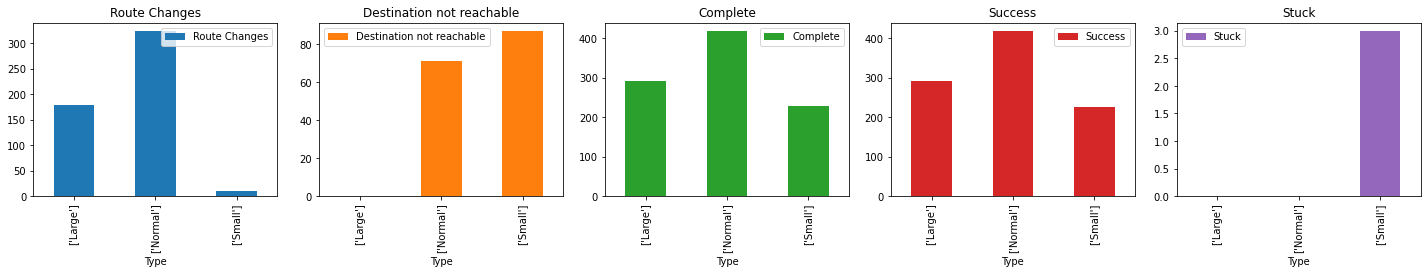

In [75]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize = (20,3))
fig.tight_layout()

single_run[single_run["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum().plot.bar(ax = axs, subplots = True)
plt.show()

<ipython-input-81-cea5623975d6>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  single_run.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success"].sum().diff(periods=1).plot(ax=ax)


<AxesSubplot:title={'center':'Ship statistics (first difference)'}, xlabel='Step'>

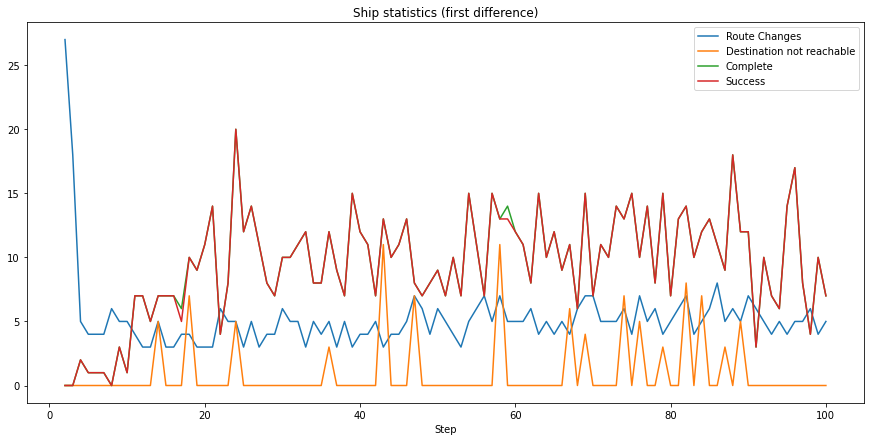

In [81]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Ship statistics (first difference)")
single_run.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success"].sum().diff(periods=1).plot(ax=ax)

In [176]:
mean_vals = single_run.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success"].sum().diff(periods=1).mean()
x = single_run.groupby("Step")["Complete"].sum().diff(periods=1).values[1:].astype(int) #data

<ipython-input-176-644979d585a0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_vals = single_run.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success"].sum().diff(periods=1).mean()


In [184]:
mean_vals

Route Changes                5.171717
Destination not reachable    0.979798
Complete                     9.454545
Success                      9.434343
dtype: float64

In [185]:
xs = [(np.random.choice(x, size=x.shape, replace=True)) for i in range(1000)] #bootstrap sample
exp = [np.random.poisson(mean_vals[2],99) for i in range(1000)] #Posssion data

Text(0.5, 1.0, 'Histogram of complete routes')

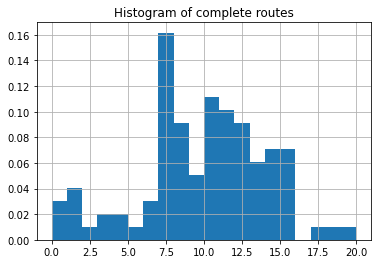

In [150]:

single_run.groupby("Step")["Complete"].sum().diff(periods=1)[1:].hist(density=True, bins = 20)
plt.title("Histogram of complete routes")

In [187]:
from scipy.stats import chisquare

print("The 'complete' statistic comes from the Poisson distribution with lamda =",x.mean())
print( chisquare(xs, f_exp=exp)[1]>=0.01)


The 'complete' statistic comes from the Poisson distribution with lamda = 9.454545454545455
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]
<ipython-input-187-9758082f7b49>:4: RuntimeWarning: invalid value encountered in greater_equal
  print( chisquare(xs, f_exp=exp)[1]>=0.01)


In [188]:

single_run.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum()

<ipython-input-188-1a9c649f75e8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  single_run.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"].sum()


,Route Changes,Destination not reachable,Complete,Success,Stuck
Step,,,,,
1,0,61,0,0,2
2,27,61,0,0,2
3,45,61,0,0,2
4,50,61,2,2,2
5,54,61,3,3,2
...,...,...,...,...,...
96,492,158,907,905,3
97,497,158,915,913,3
98,503,158,919,917,3
